# Trzy Prawa Keplera

Johannes Kepler (1571–1630) był niemieckim astronomem i matematykiem, który na podstawie precyzyjnych obserwacji Marsa dokonanych przez Tycho Brahego sformułował trzy fundamentalne prawa opisujące ruch planet wokół Słońca. Te prawa zapoczątkowały nowoczesną mechanikę nieba i wyznaczyły drogę Newtonowi do sformułowania prawa powszechnego ciążenia.

### 1. Prawo orbit

> **Każda planeta porusza się po elipsie, w której w jednym z ognisk znajduje się Słońce.**

Elipsa opisana jest równaniem:
$$
\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1
$$

gdzie:
- $a$ — półoś wielka,
- $b$ — półoś mała,
- ognisko znajduje się w odległości $c = \sqrt{a^2 - b^2}$ od środka.

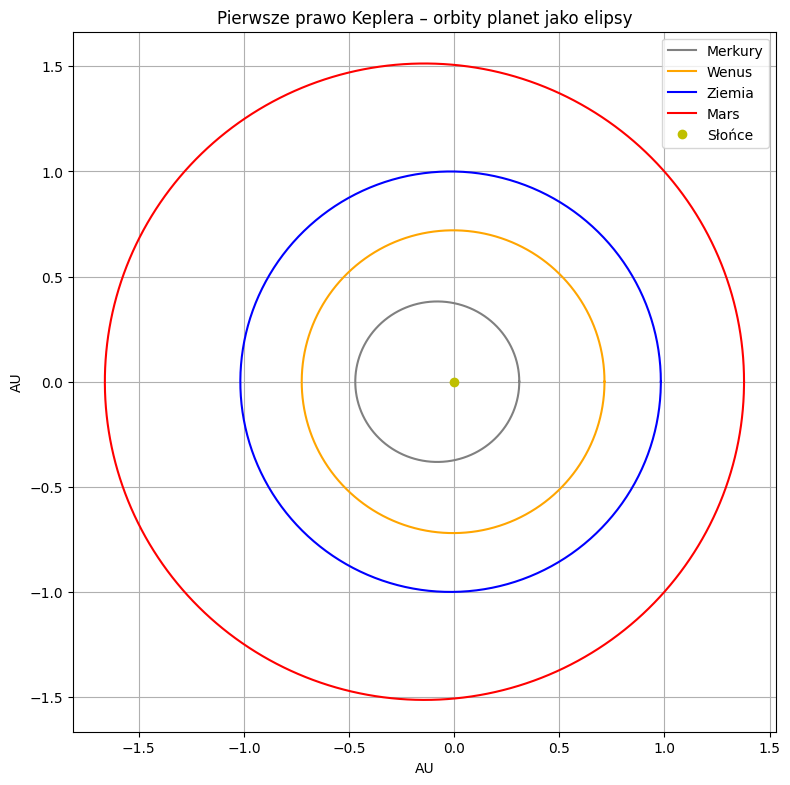

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Funkcja do rysowania elipsy
def draw_orbit(a, e, label, color):
    b = a * np.sqrt(1 - e**2)  # mniejsza półoś
    theta = np.linspace(0, 2*np.pi, 500)
    x = a * np.cos(theta) - a * e  # przesunięcie ogniska do (–ae, 0)
    y = b * np.sin(theta)
    plt.plot(x, y, label=label, color=color)

# Parametry orbit (półosie wielkie w AU, mimośród)
planets_data = [
    ("Merkury", 0.39, 0.206, 'gray'),
    ("Wenus", 0.72, 0.007, 'orange'),
    ("Ziemia", 1.00, 0.017, 'blue'),
    ("Mars", 1.52, 0.093, 'red')
]

# Rysowanie orbit
plt.figure(figsize=(8, 8))
for name, a, e, color in planets_data:
    draw_orbit(a, e, name, color)

# Słońce w jednym z ognisk elipsy (wspólne dla wszystkich – punkt (0, 0))
plt.plot(0, 0, 'yo', label='Słońce')

plt.gca().set_aspect('equal')
plt.title("Pierwsze prawo Keplera – orbity planet jako elipsy")
plt.xlabel("AU")
plt.ylabel("AU")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### 2. Prawo pól

> **Promień wodzący planety zakreśla równe pola w równych odstępach czasu.**

Oznacza to, że prędkość orbitalna planety nie jest stała, lecz zmienia się tak, aby planeta poruszała się szybciej, gdy jest bliżej Słońca.

Z matematycznego punktu widzenia:
$$
\frac{dA}{dt} = \text{const}
$$

Gdzie $A$ to pole powierzchni zakreślone przez promień wodzący.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Polygon
from IPython.display import HTML

# Parametry orbity
a = 10.0  # półoś wielka
e = 0.7   # mimośród
b = a * np.sqrt(1 - e**2)  # półoś mała

# Położenie Słońca (w ognisku elipsy)
sun_x = a * e
sun_y = 0.0

# Funkcja obliczająca pozycję planety
def planet_position(t, T=10.0):
    M = 2 * np.pi * t / T
    E = M
    for _ in range(50):
        E = E - (E - e * np.sin(E) - M) / (1 - e * np.cos(E))
    x = a * (np.cos(E) - e)
    y = b * np.sin(E)
    return np.array([x]), np.array([y])

# Funkcja obliczająca pole trójkąta
def calculate_area(p1, p2):
    return 0.5 * abs(p1[0]*p2[1] - p1[1]*p2[0])

# Przygotowanie wykresu
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_xlim(-a*2, a*2)  # Zwiększony zakres
ax.set_ylim(-b*2, b*2)  # Zwiększony zakres
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title("Drugie Prawo Keplera: Prawo Równych Pól", fontsize=16, pad=20)
ax.set_xlabel('Odległość [j.a.]', fontsize=12)
ax.set_ylabel('Odległość [j.a.]', fontsize=12)

# Narysuj orbitę
theta = np.linspace(0, 2*np.pi, 300)
orbit_x = a * np.cos(theta) - sun_x
orbit_y = b * np.sin(theta)
ax.plot(orbit_x, orbit_y, 'k-', lw=1.5, alpha=0.7)

# Narysuj Słońce
sun = plt.Circle((0, 0), 0.6, color='gold', alpha=0.9)
ax.add_patch(sun)
ax.text(0, 0.8, "Słońce", ha='center', va='center', fontsize=12)

# Elementy animacji
planet, = ax.plot([], [], 'bo', markersize=12)
triangle = Polygon([[0, 0], [0, 0], [0, 0]], closed=True,
                   color='royalblue', alpha=0.4)
ax.add_patch(triangle)

# Tekst z informacjami
time_text = ax.text(0.02, 0.96, '', transform=ax.transAxes, fontsize=12)
area_text = ax.text(0.02, 0.92, '', transform=ax.transAxes, fontsize=12)

# Inicjalizacja
def init():
    planet.set_data([], [])
    triangle.set_xy([[0, 0], [0, 0], [0, 0]])
    time_text.set_text('')
    area_text.set_text('')
    return planet, triangle, time_text, area_text

# Animacja
def animate(t):
    # Pozycja planety
    x, y = planet_position(t)
    planet.set_data(x, y)

    # Oblicz następną pozycję po krótkim czasie
    x1, y1 = planet_position(t)
    x2, y2 = planet_position(t + 0.1)

    # Aktualizuj trójkąt
    triangle.set_xy(np.vstack([[0, 0], np.column_stack([x1, y1]),
                             np.column_stack([x2, y2])]))

    # Oblicz pole
    area = calculate_area([x1[0], y1[0]], [x2[0], y2[0]])

    # Aktualizuj tekst
    time_text.set_text(f'Czas: {t:.2f} lat')
    area_text.set_text(f'Pole trójkąta: {area:.3f} j.a.²')

    return planet, triangle, time_text, area_text

# Utwórz animację
ani = animation.FuncAnimation(
    fig, animate, frames=np.linspace(0, 10, 250),
    init_func=init, blit=True, interval=50
)

plt.close()
HTML(ani.to_html5_video())


### 3. Prawo okresów

> **Kwadrat okresu obiegu planety wokół Słońca jest proporcjonalny do sześcianu półosi wielkiej jej orbity:**
$$
T^2 \propto a^3
$$

W układzie SI (dla orbit wokół Słońca):
$$
\frac{T^2}{a^3} = \frac{4\pi^2}{G M}
$$

gdzie:
- $T$ — okres obiegu planety,
- $a$ — półoś wielka orbity,
- $G$ — stała grawitacyjna,
- $M$ — masa Słońca.

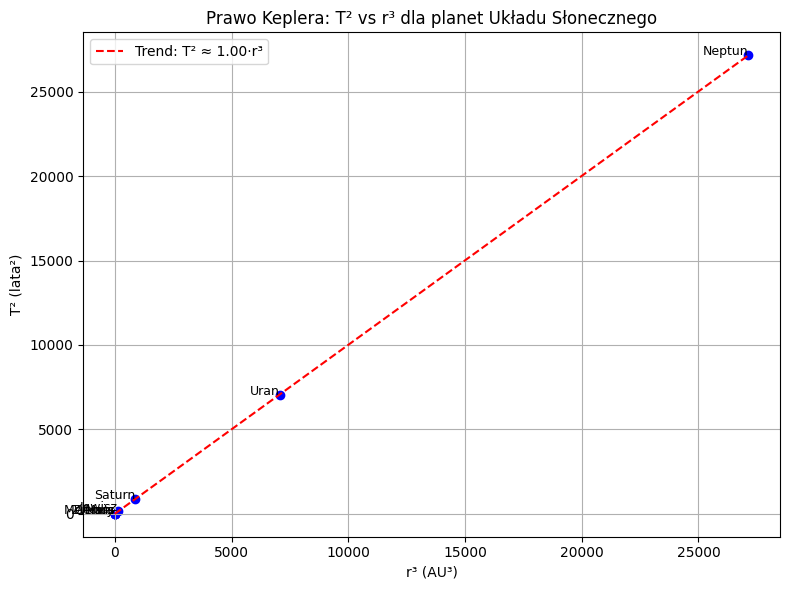

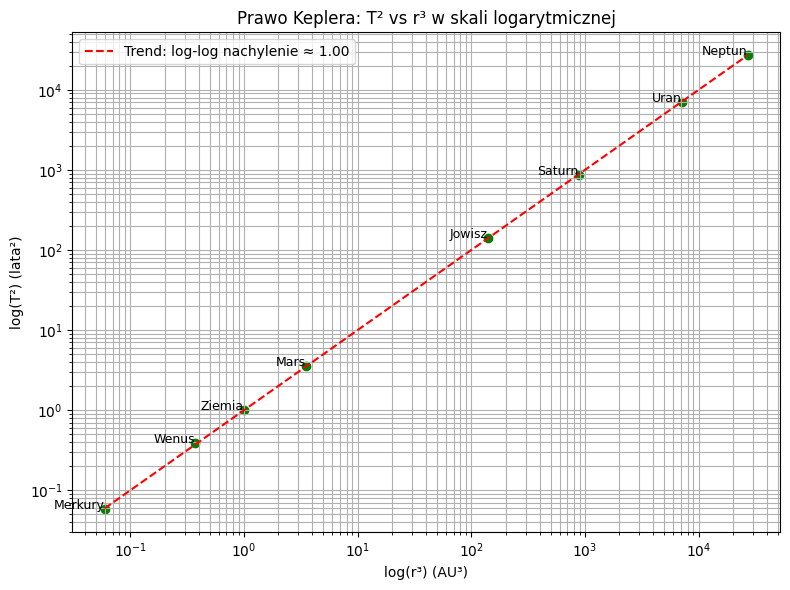

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Dane: półosie wielkie orbit (AU) i okresy orbitalne (lata)
planets = [
    ("Merkury", 0.39, 0.24),
    ("Wenus", 0.72, 0.62),
    ("Ziemia", 1.00, 1.00),
    ("Mars", 1.52, 1.88),
    ("Jowisz", 5.20, 11.86),
    ("Saturn", 9.58, 29.46),
    ("Uran", 19.20, 84.01),
    ("Neptun", 30.05, 164.8)
]

# Ekstrahowanie wartości
r = np.array([p[1] for p in planets])       # Półosie wielkie
T = np.array([p[2] for p in planets])       # Okresy orbitalne
names = [p[0] for p in planets]             # Nazwy planet

# Obliczenia
T_squared = T**2
r_cubed = r**3

# Wykres liniowy
plt.figure(figsize=(8, 6))
plt.scatter(r_cubed, T_squared, color='blue')
for i, name in enumerate(names):
    plt.text(r_cubed[i], T_squared[i], name, fontsize=9, ha='right')

# Linia trendu
m, b = np.polyfit(r_cubed, T_squared, 1)
plt.plot(r_cubed, m * r_cubed + b, color='red', linestyle='--', label=f"Trend: T² ≈ {m:.2f}·r³")
plt.title("Prawo Keplera: T² vs r³ dla planet Układu Słonecznego")
plt.xlabel("r³ (AU³)")
plt.ylabel("T² (lata²)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Wykres log-log
plt.figure(figsize=(8, 6))
plt.scatter(r_cubed, T_squared, color='green')
for i, name in enumerate(names):
    plt.text(r_cubed[i], T_squared[i], name, fontsize=9, ha='right')

# Skale logarytmiczne
plt.xscale('log')
plt.yscale('log')

# Linia trendu log-log
log_r_cubed = np.log10(r_cubed)
log_T_squared = np.log10(T_squared)
m_log, b_log = np.polyfit(log_r_cubed, log_T_squared, 1)
x_vals = np.logspace(np.log10(min(r_cubed)), np.log10(max(r_cubed)), 100)
plt.plot(x_vals, 10**(m_log * np.log10(x_vals) + b_log), 'r--', label=f"Trend: log-log nachylenie ≈ {m_log:.2f}")

plt.title("Prawo Keplera: T² vs r³ w skali logarytmicznej")
plt.xlabel("log(r³) (AU³)")
plt.ylabel("log(T²) (lata²)")
plt.grid(True, which='both')
plt.legend()
plt.tight_layout()
plt.show()
